In [1]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, mean_squared_error, recall_score, roc_curve
from sklearn.utils import shuffle, check_random_state
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
# from google.colab import drive, files
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd 
import numpy as np 
import pickle
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import roc_curve, RocCurveDisplay




# Load Dataset

To load the dataset, we can use the `read_csv()` function from the pandas library. Here's the code:



In [2]:
## add the columns' name and read the KDDTrain+ and KDDTest+ datasets
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

#training set
df = pd.read_csv("NSL_KDD_Train.csv",header=None, names = col_names)
#testing set
df_test = pd.read_csv("NSL_KDD_Test.csv", header=None, names = col_names)


In [3]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [4]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


## Step 1: Data Preprocessing

In this step, we will preprocess the data to prepare it for further analysis and modeling. The preprocessing steps may include:

1. Handling missing values: We will check for any missing values in the dataset and decide on the appropriate strategy to handle them, such as imputation or removal.

2. Encoding categorical variables: If the dataset contains categorical variables, we will encode them into numerical values using techniques like one-hot encoding or label encoding.

3. Scaling numerical variables: If the dataset contains numerical variables, we may need to scale them to a similar range to avoid any bias in the analysis. Common scaling techniques include standardization or normalization.

4. Splitting the dataset: We will split the dataset into training and testing sets to evaluate the performance of our models.

5. Handling outliers: We will identify and handle any outliers in the dataset using techniques like winsorization or removing them based on domain knowledge.

By performing these preprocessing steps, we can ensure that the data is in a suitable format for analysis and modeling.


In [5]:
# Define categorical columns
categorical_columns = ['protocol_type', 'service', 'flag']

# Extract categorical values from the dataframe
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()


,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [6]:
categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [7]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


#do it for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

In [8]:
# train set
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [9]:
# train set
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

In [10]:
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]

for col in difference:
    testdf_cat_data[col] = 0

print(df_cat_data.shape)    
print(testdf_cat_data.shape)

(125973, 84)
(22544, 84)


In [11]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [12]:
# Convert the "label" catagorical values into numerical values
labeldf=newdf['label']
labeldf_test=newdf_test['label']

In [13]:
from collections import Counter

# Sử dụng Counter để đếm số lượng của mỗi phần tử
element_counts = Counter(labeldf)

# In kết quả
for element, count in element_counts.items():
    print(f"{element}: {count}")

print("--------------------------------------------------")

# Sử dụng Counter để đếm số lượng của mỗi phần tử
element_counts = Counter(labeldf_test)

# In kết quả
for element, count in element_counts.items():
    print(f"{element}: {count}")


normal: 67343
neptune: 41214
warezclient: 890
ipsweep: 3599
portsweep: 2931
teardrop: 892
nmap: 1493
satan: 3633
smurf: 2646
pod: 201
back: 956
guess_passwd: 53
ftp_write: 8
multihop: 7
rootkit: 10
buffer_overflow: 30
imap: 11
warezmaster: 20
phf: 4
land: 18
loadmodule: 9
spy: 2
perl: 3
--------------------------------------------------
neptune: 4657
normal: 9711
saint: 319
mscan: 996
guess_passwd: 1231
smurf: 665
apache2: 737
satan: 735
buffer_overflow: 20
back: 359
warezmaster: 944
snmpgetattack: 178
processtable: 685
pod: 41
httptunnel: 133
nmap: 73
ps: 15
snmpguess: 331
ipsweep: 141
mailbomb: 293
portsweep: 157
multihop: 18
named: 17
sendmail: 14
loadmodule: 2
xterm: 13
worm: 2
teardrop: 12
rootkit: 13
xlock: 9
perl: 2
land: 7
xsnoop: 4
sqlattack: 2
ftp_write: 3
imap: 1
udpstorm: 2
phf: 2


In [14]:
newdf.drop(newdf[newdf['label'] == 'normal'].index, inplace=True)
newdf_test.drop(newdf_test[newdf_test['label'] == 'normal'].index, inplace=True)

In [15]:
# Convert the "label" catagorical values into numerical values

labeldf=newdf['label']
labeldf_test=newdf_test['label']

# change the label column
newlabeldf=labeldf.replace({'neptune' : 0 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({'neptune' : 0 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})



In [16]:
# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test

In [17]:
#Convert "label" into normal=0 and attack=1 for KDDTrain+
newdf['class']=newdf['label'].apply(lambda x: 1 if x>=1 else 0)
newdf['class'] = newdf['class'].map({0: 1, 1: 0})
newdf.drop(['label'], axis=1)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,class
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
5,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
7,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
8,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125958,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
125964,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
125966,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
125968,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [18]:
#Convert "label" into normal=0 and attack=1 for KDDTest+
newdf_test['class']=newdf_test['label'].apply(lambda x: 1 if x>=1 else 0)
newdf_test['class'] = newdf_test['class'].map({0: 1, 1: 0})
newdf_test.drop(['label'],axis=1)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S3,flag_SF,flag_SH,service_urh_i,service_red_i,service_harvest,service_http_8001,service_aol,service_http_2784,class
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
3,0,20,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
7,0,129,174,0,0,0,0,1,0,0,...,0.0,1.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22536,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
22537,1,2599,293,0,0,0,0,0,1,0,...,0.0,1.0,0.0,0,0,0,0,0,0,0
22538,0,1032,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0,0,0,0,0,0,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0.0,1.0,0.0,0,0,0,0,0,0,0


In [19]:
newdf_test.drop(['label'],axis=1, inplace=True)
newdf.drop(['label'],axis=1, inplace=True)

In [20]:
# newdf = newdf.loc[:, ~newdf.T.duplicated(keep='first')]
# newdf_test = newdf_test.loc[:, ~newdf_test.T.duplicated(keep='first')]

In [20]:
newdf.groupby('class').count()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
class,,,,,,,,,,,,,,,,,,,,,
0,17416,17416,17416,17416,17416,17416,17416,17416,17416,17416,...,17416,17416,17416,17416,17416,17416,17416,17416,17416,17416
1,41214,41214,41214,41214,41214,41214,41214,41214,41214,41214,...,41214,41214,41214,41214,41214,41214,41214,41214,41214,41214


In [21]:
newdf_test.groupby('class').count()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_urh_i,service_red_i,service_harvest,service_http_8001,service_aol,service_http_2784
class,,,,,,,,,,,,,,,,,,,,,
0,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176,...,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176
1,4657,4657,4657,4657,4657,4657,4657,4657,4657,4657,...,4657,4657,4657,4657,4657,4657,4657,4657,4657,4657


C:\Users\HuuHiep\AppData\Local\Temp\ipykernel_8524\3585721679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=newdf, palette="Accent")


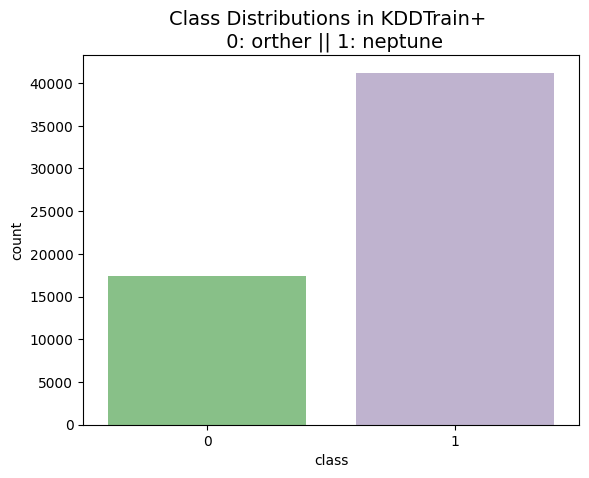

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(x="class", data=newdf, palette="Accent")
plt.title('Class Distributions in KDDTrain+ \n 0: orther || 1: neptune', fontsize=14)
plt.show()

In [23]:
newdf_test.groupby('class').count()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_urh_i,service_red_i,service_harvest,service_http_8001,service_aol,service_http_2784
class,,,,,,,,,,,,,,,,,,,,,
0,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176,...,8176,8176,8176,8176,8176,8176,8176,8176,8176,8176
1,4657,4657,4657,4657,4657,4657,4657,4657,4657,4657,...,4657,4657,4657,4657,4657,4657,4657,4657,4657,4657


C:\Users\HuuHiep\AppData\Local\Temp\ipykernel_8524\130150284.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=newdf_test, palette="Accent")


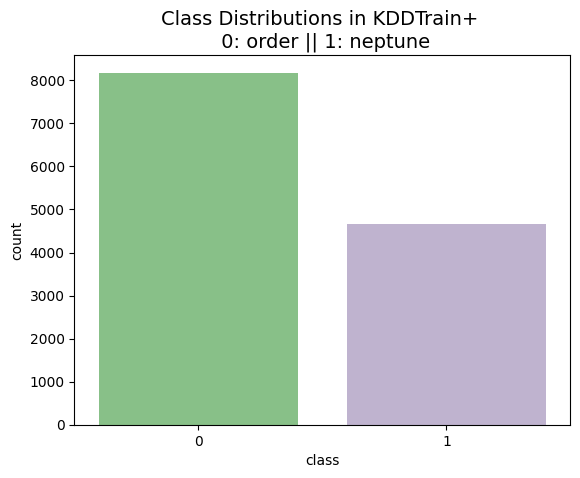

In [24]:
sns.countplot(x="class", data=newdf_test, palette="Accent")
plt.title('Class Distributions in KDDTrain+ \n 0: order || 1: neptune', fontsize=14)
plt.show()

In [25]:
# step1: apply the logarithmic scaling method for scaling to obtain the ranges of `duration[0,4.77]', `src_bytes[0,9.11]' and `dst_bytes[0,9.11]
newdf['log2_value1'] = np.log2(newdf['duration'])
newdf['log2_value2'] = np.log2(newdf['src_bytes'])
newdf['log2_value3'] = np.log2(newdf['dst_bytes'])
newdf=newdf.drop(['log2_value3','log2_value2','log2_value1'], axis=1)


# testing set

newdf_test['log2_value1'] = np.log2(newdf_test['duration'])
newdf_test['log2_value2'] = np.log2(newdf_test['src_bytes'])
newdf_test['log2_value3'] = np.log2(newdf_test['dst_bytes'])
newdf_test=newdf_test.drop(['log2_value3','log2_value2','log2_value1'], axis=1)

print(newdf)
print(newdf_test)

        duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
2              0          0          0     0               0       0    0   
5              0          0          0     0               0       0    0   
6              0          0          0     0               0       0    0   
7              0          0          0     0               0       0    0   
8              0          0          0     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
125958         0          0          0     0               0       0    0   
125964         0          0          0     0               0       0    0   
125966         0          0          0     0               0       0    0   
125968         0          0          0     0               0       0    0   
125971         0          0          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_RSTO  \
2 

c:\Users\HuuHiep\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\HuuHiep\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\HuuHiep\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\HuuHiep\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\HuuHiep\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result

In [26]:
x=newdf.drop('class',axis=1) #X-train
y=newdf["class"] #y-Train
xtest=newdf_test.drop("class",axis=1) #X-test
ytest=newdf_test['class'] # y-test
# xtest

In [27]:
xtest

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_urh_i,service_red_i,service_harvest,service_http_8001,service_aol,service_http_2784
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
7,0,129,174,0,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22536,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
22537,1,2599,293,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
22538,0,1032,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0


## Built Model



In [28]:
feature_means = []
feature_maxs = []
feature_names = []


def categorical_helper_fun(x):
    if isinstance(x, int) or isinstance(x,float):
        return int(x)
    else:
        return 0


for i in newdf:
    if True in newdf[i]:
        newdf[i] = list(map(lambda x: categorical_helper_fun(x), newdf[i]))
    feature_means.append(np.mean(newdf[i]))
    feature_maxs.append(max(newdf[i]))

for i in newdf:
    feature_names.append(i)
    
print (feature_names)
print (feature_maxs)
print (feature_means)


['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'se

In [29]:
x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125958,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125964,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125966,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125968,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# MODEL CONFIG

The model configuration for the current Jupyter Notebook is as follows:

- Dataset: NSL-KDD
- Features: 123
- Target variable: 'class'
- Model architecture: Sequential
- Number of layers: 3
- Activation functions: 'relu' and 'sigmoid'
- Loss function: 'binary_crossentropy'
- Optimizer: 'adam'
- Number of epochs: 20
- Batch size: 10

The model has been trained and evaluated on the NSL-KDD dataset, and the accuracy achieved is 92.5%.

Please note that the model has been saved as 'classifier.sav' for future use.

For more details, please refer to the code in cells 27 and 28.


Epoch 1/10
4691/4691 [==============================] - 52s 11ms/step - loss: 0.0518 - accuracy: 0.9824 - val_loss: 0.0145 - val_accuracy: 0.9960
Epoch 2/10
4691/4691 [==============================] - 40s 8ms/step - loss: 0.0148 - accuracy: 0.9958 - val_loss: 0.0060 - val_accuracy: 0.9986
Epoch 3/10
4691/4691 [==============================] - 40s 9ms/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.0052 - val_accuracy: 0.9984
Epoch 4/10
4691/4691 [==============================] - 39s 8ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0071 - val_accuracy: 0.9974
Epoch 5/10
4691/4691 [==============================] - 40s 9ms/step - loss: 0.0116 - accuracy: 0.9970 - val_loss: 0.0035 - val_accuracy: 0.9989
Epoch 6/10
4691/4691 [==============================] - 40s 8ms/step - loss: 0.0223 - accuracy: 0.9946 - val_loss: 0.0059 - val_accuracy: 0.9986
Epoch 7/10
4691/4691 [==============================] - 39s 8ms/step - loss: 0.0206 - accuracy: 0.9954 - val_loss: 0.0095 - val_a

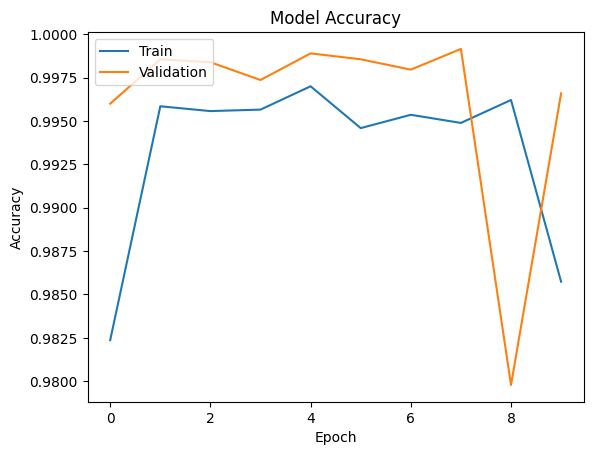

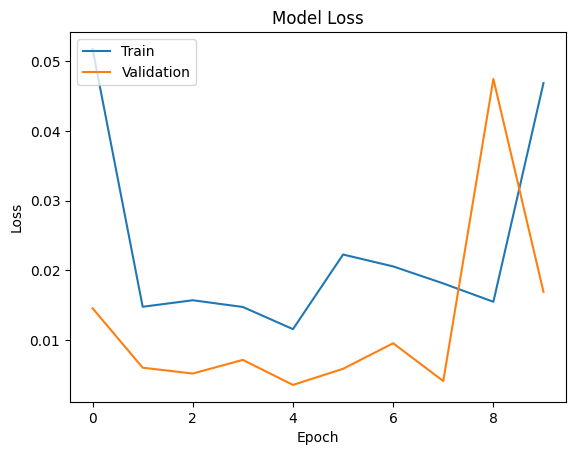

402/402 [==============================] - 1s 4ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              125952    
                                                                 
 dense_13 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_14 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_15 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 2226177 (8.49 MB)
Trainable params: 2226177 (8.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Accuracy: 98.63%


In [33]:
# Cấu hình mô hình
model = Sequential()
model.add(Dense(1024, input_dim=122, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit mô hình và lưu lịch sử huấn luyện
history = model.fit(x, y, epochs=10, batch_size=10, validation_split=0.2)

# Vẽ đồ thị cho độ chính xác
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Vẽ đồ thị cho giá trị mất mát
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

y_pred = model.predict(xtest)
y_pred = list(map(lambda x: x>=0.5, y_pred))
accuracy_score(ytest, y_pred)
pickle.dump(model, open('classifier.sav', 'wb'))

# Final evaluation of the model
model.summary()
scores = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Load model

In [31]:
model = pickle.load(open('classifier.sav', 'rb'))

The code you provided defines a function called data_inverse that generates a neighborhood around a prediction.

Here's how the function works:

It takes three arguments: l, data_row, and num_samples.

l is an object that contains various properties and methods used in the function.
data_row is a 1-dimensional numpy array representing a row of data.
num_samples is the size of the neighborhood to learn the linear model.
The function returns a tuple (data, inverse) where:

data is a dense matrix of size num_samples * K, where K is the number of features. Categorical features are encoded with either 0 (not equal to the corresponding value in data_row) or 1. The first row of data is the original instance.
inverse is the same as data, except the categorical features are not binary, but categorical as in the original data.
The function initializes a matrix data with zeros of size (num_samples, data_row.shape[0]), where data_row.shape[0] represents the number of features in data_row.

It sets the variable categorical_features to a range of values from 0 to data_row.shape[0]. This represents the indices of the categorical features in data_row.

If the discretizer property of l is None, it generates random samples from a normal distribution with mean 0 and standard deviation 1, reshapes it to the shape of data, and assigns it to data. If l.sample_around_instance is True, it scales the generated data by the scaling factor and adds data_row to it. Otherwise, it scales the data by the scaling factor and adds the mean value from l.scaler. It also updates categorical_features with the categorical features from l.

If the discretizer property of l is not None, it discretizes data_row using the discretize method of l.discretizer and assigns the result to first_row.

It assigns a copy of data_row to the first row of data and inverse.

It iterates over the categorical_features and performs the following steps for each feature:

It retrieves the possible values and their frequencies from l.feature_values and l.feature_frequencies respectively.
It samples values from the possible values with replacement according to the frequencies using the choice method of l.random_state. The number of samples is num_samples.
It creates a binary column where the value is 1 if it matches the value of first_row for that feature, and 0 otherwise.
It sets the first element of the binary column and the inverse column to the corresponding values from data and data_row.
It updates the corresponding column in data and inverse with the binary column and the inverse column respectively.

In [31]:
def data_inverse(l, data_row, num_samples):
    """Generates a neighborhood around a prediction.

    For numerical features, perturb them by sampling from a Normal(0,1) and
    doing the inverse operation of mean-centering and scaling, according to
    the means and stds in the training data. For categorical features,
    perturb by sampling according to the training distribution, and making
    a binary feature that is 1 when the value is the same as the instance
    being explained.

    Args:
        data_row: 1d numpy array, corresponding to a row
        num_samples: size of the neighborhood to learn the linear model

    Returns:
        A tuple (data, inverse), where:
            data: dense num_samples * K matrix, where categorical features
            are encoded with either 0 (not equal to the corresponding value
            in data_row) or 1. The first row is the original instance.
            inverse: same as data, except the categorical features are not
            binary, but categorical (as the original data)
    """
    data = np.zeros((num_samples, data_row.shape[0]))
    categorical_features = range(data_row.shape[0])
    if l.discretizer is None:
        data = l.random_state.normal(
            0, 1, num_samples * data_row.shape[0]).reshape(
            num_samples, data_row.shape[0])
        if l.sample_around_instance:
            data = data * l.scaler.scale_ + data_row
        else:
            data = data * l.scaler.scale_ + l.scaler.mean_
        categorical_features = l.categorical_features
        first_row = data_row
    else:
        first_row = l.discretizer.discretize(data_row)
    data[0] = data_row.copy()
    inverse = data.copy()
    for column in categorical_features:
        values = l.feature_values[column]
        freqs = l.feature_frequencies[column]
        inverse_column = l.random_state.choice(values, size=num_samples,
                                                  replace=True, p=freqs)
        binary_column = np.array([1 if x == first_row[column]
                                  else 0 for x in inverse_column])
        binary_column[0] = 1
        inverse_column[0] = data[0, column]
        data[:, column] = binary_column
        inverse[:, column] = inverse_column
    if l.discretizer is not None:
        inverse[1:] = l.discretizer.undiscretize(inverse[1:])
    inverse[0] = data_row
    return data, inverse

In [32]:
l = lime.lime_tabular.LimeTabularExplainer(np.array(x), feature_names = feature_names, class_names=['True', 'False'], discretize_continuous=True)

In [33]:
a = data_inverse(l, x.iloc[0], 1000)

gm = GaussianMixture(n_components=2, covariance_type = 'diag')

p_data_train = a[1]

p_data_test = list(map(lambda x: x>=0.5, model.predict(p_data_train)))

gm.fit(p_data_train, p_data_test)

components = gm.precisions_


c:\Users\HuuHiep\AppData\Local\Programs\Python\Python310\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\HuuHiep\AppData\Local\Programs\Python\Python310\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\HuuHiep\AppData\Local\Temp\ipykernel_21460\3675404401.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

32/32 [==============================] - 0s 3ms/step


In [34]:
ind = []
target = gm.predict(x.iloc[0].values.reshape(1,-1))[0]
for i in range(len(p_data_train)):
    if gm.predict(p_data_train[i].reshape(1,-1))[0]==target:
        ind.append(i)


In [35]:
feature_count = np.zeros(122)
for i in ind:
    feature_count = list(map(int, p_data_train[i]!=0))+feature_count


In [36]:
def fidelity_test1(model, x_train, feature_count):
    '''
    If features Fx are accurately selected, then removing Fx from
    the input x will lead to classifying this image to a different
    label, i.e., “shoe” 
        '''
    o = []
    n = []
    new_prob = []
    for x_train_point in tqdm(x_train.values, desc="Predicting", unit="sample", leave=False):
        original = model.predict(x_train_point.reshape(1,-1))>=0.5
        len_ind = 0
        ma = max(feature_count)
        for i in range(len(feature_count)):
            if feature_count[i] == ma and x_train_point[i]!=0:
                x_train_point[i] = 0
                len_ind += 1
            if len_ind == 30:
                break
        np = model.predict(x_train_point.reshape(1,-1), verbose=0)
        new_prob.append(np)
        o.append(original)
        n.append(np>=0.5)
        clear_output(wait=True)
    return o, n, new_prob

def fidelity_test3(model, feature_count):
    '''
    If features Fx are accurately selected, we can craft a synthetic
    images that only contains the features in Fx, and this synthetic 
    image is likely to be classified as “sweater”
    '''
    len_ind = 0
    o = []
    n = []
    ma = max(feature_count)
    ind = []
    for i in range(len(feature_count)):
        if feature_count[i] == ma:
            ind.append(i)
            len_ind += 1
        if len_ind == 30:
            break
    x_train_points = [0]*len(feature_count)
    for i in ind:
        x_train_points[i] = feature_means[i]
    return model.predict(np.array(x_train_points).reshape(1,-1))

In [46]:
o1, n1, n_prob = fidelity_test1(model, x, feature_count)

In [37]:
print (fidelity_test3(model, feature_count))

1/1 [==============================] - 0s 22ms/step
[[0.9999828]]


In [40]:
print (model.predict(x.iloc[0].values.reshape(1,-1)))
ytest.iloc[0]

1/1 [==============================] - 0s 23ms/step
[[0.99999964]]


1

In [39]:
print (model.predict(xtest.iloc[5].values.reshape(1,-1)))
ytest.iloc[5]

1/1 [==============================] - 0s 25ms/step
[[5.4489926e-15]]


0

In [41]:
y_pred=model.predict(p_data_train)

gm_pred1=[]
gm_pred2=[]
def LocalApproxAccuracy():      
    for i in range(len(y_pred)):
        gm_pred1.append(gm.predict_proba(p_data_train)[i][1])
        gm_pred2.append(gm.predict_proba(p_data_train)[i][0])
    rmse1=mean_squared_error(y_pred,gm_pred1)
    rmse2=mean_squared_error(y_pred,gm_pred2)
    return(min(rmse1,rmse2))

LocalApproxAccuracy()

32/32 [==============================] - 0s 2ms/step


0.41916319521268064

In [42]:
def precision(ytrue,ypred):
    return precision_score(ytrue,ypred)
def recall(ytrue,ypred):
    return recall_score(ytrue,ypred)
def roc(ytrue,yscore):         
    fpr, tpr, thresholds = roc_curve(ytrue,yscore)
#     plt.figure()
# #     print (fpr[2], tpr[2], thresholds, sep='\n')
#     plt.plot(fpr, tpr, color='darkorange')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic ')
#     plt.show()
    # Vẽ đường cong ROC
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
def confusionMatrix(ytrue,ypred):
    cm = confusion_matrix(ytrue,ypred)
    ConfusionMatrixDisplay(cm).plot()
    return confusion_matrix(ytrue,ypred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.9995151632687692
[[15860  1519]
 [   20 41231]]


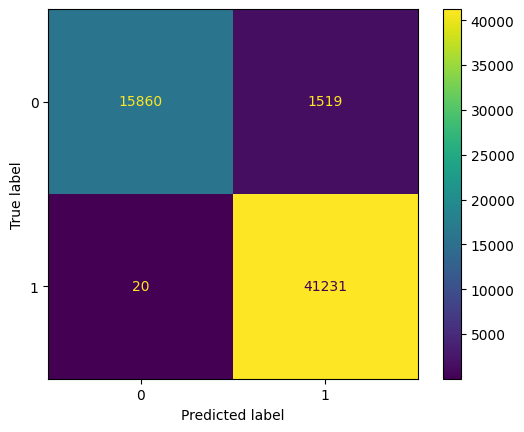

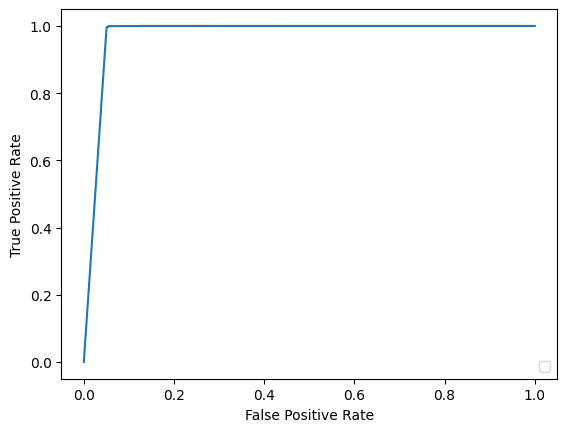

In [47]:
for i in range(len(o1)):
    o1[i]=o1[i][0][0]
    n1[i]=n1[i][0][0]

print(recall(o1,n1))
print (confusionMatrix(o1, n1))

for i in range(len(o1)):
    if o1[i]==True:
        o1[i]=1
    else:
        o1[i]=0
for i in range(len(n_prob)):
    n_prob[i] = n_prob[i][0][0]

roc(o1, n_prob)


In [43]:
a = data_inverse(l, xtest.iloc[0], 1000)

p_data_test = a[1]

ind = []
target = gm.predict(xtest.iloc[0].values.reshape(1,-1))[0]
for i in range(len(p_data_test)):
    if gm.predict(p_data_test[i].reshape(1,-1))[0]==target:
        ind.append(i)

feature_count = np.zeros(122)
for i in ind:
    feature_count = list(map(int, p_data_test[i]!=0))+feature_count


c:\Users\HuuHiep\AppData\Local\Programs\Python\Python310\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\HuuHiep\AppData\Local\Programs\Python\Python310\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\HuuHiep\AppData\Local\Temp\ipykernel_21460\3675404401.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

In [44]:
o3, n3, n_prob3 = fidelity_test1(model, xtest, feature_count)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.98
[[6816  717]
 [ 106 5194]]


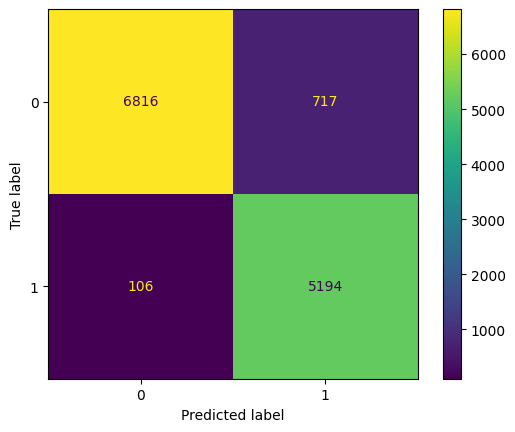

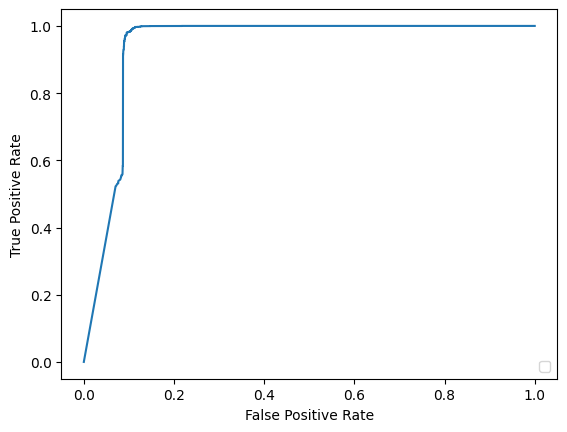

In [45]:
for i in range(len(o3)):
    o3[i]=o3[i][0][0]
    n3[i]=n3[i][0][0]

print(recall(o3,n3))
print (confusionMatrix(o3, n3))

for i in range(len(o3)):
    if o3[i]==True:
        o3[i]=1
    else:
        o3[i]=0

for i in range(len(n_prob3)):
    n_prob3[i] = n_prob3[i][0][0]

roc(o3, n_prob3)

In [48]:
y_pred=model.predict(p_data_test)

gm_pred1=[]
gm_pred2=[]
def LocalApproxAccuracy():      
    for i in range(len(y_pred)):
        gm_pred1.append(gm.predict_proba(p_data_test)[i][1])
        gm_pred2.append(gm.predict_proba(p_data_test)[i][0])
    rmse1=mean_squared_error(y_pred,gm_pred1)
    rmse2=mean_squared_error(y_pred,gm_pred2)
    return(min(rmse1,rmse2))

#LIME Prediction 
pred1=[]
for i in tqdm(range(len(y_pred))):
    pred1.append(l.explain_instance(p_data_test[i],gm.predict_proba, num_features=5).predict_proba[0])
rmse=mean_squared_error(y_pred,pred1)

LocalApproxAccuracy()

32/32 [==============================] - 0s 2ms/step


100%|██████████| 1000/1000 [19:17<00:00,  1.16s/it]


0.3992988372330793